# 강의 01 고전 정보와 컴퓨팅

이번 실습 강연의 목표 : 기초 논리 회로의 구현, 함수와 클래스 사용법

In [1]:
# boolean 변수는 True 또는 False의 값을 가집니다. 1 또는 0으로 표현할 수도 있습니다.
a = True
b = False
print('a: ', a)
print('b: ', b)

a:  True
b:  False


In [2]:
# boolean --> int
print('integer value of a: ', int(a))
print('integer value of b: ', int(b))

# int --> boolean 
print('boolean value of 1: ', bool(1))
print('boolean value of 0: ', bool(0))


integer value of a:  1
integer value of b:  0
boolean value of 1:  True
boolean value of 0:  False


## Boolean 연산자의 구현 - 단일 논리 연산자

In [3]:
# NOT 게이트는 boolean 변수 앞에 not을 붙이면 됩니다.
print(not a)
print(not b)

False
True


In [4]:
# 함수의 형태로 정의해 봅시다.
def not_gate(a: bool) -> bool:
  return not a 

In [5]:
# 두 가지 입력값에 대한 결과를 살펴 봅시다.
for a in [True, False]: # True/False 두가지 값을 각각 넣어봅니다.
  print(f'input : {a}, output : {not_gate(a)}')  # f-string 출력

input : True, output : False
input : False, output : True


In [6]:
# not gate를 두번 가하면 identity gate와 동일하게 됩니다.
for a in [True, False]:
  print(f'input : {a}, output : {not_gate(not_gate(a))}') 


input : True, output : True
input : False, output : False


In [7]:
# 더 진행하기 전에 몇가지 편의를 위한 함수를 정의해봅시다.
from itertools import product

def generate_truth_table(num_inputs: int, func: object): 
  # 함수를 입력변수로 받을 수도 있습니다.
  print(f"Truth table of {func.__name__}")

  prod = product([False, True], repeat=num_inputs)  
  # 모든 입력값의 경우의 수를 조합합니다.
  
  for args in prod:
    print(f'input: {args}, output: {func(*args)}')


In [8]:
# 잘 작동하는지 확인해봅시다.
generate_truth_table(1, not_gate)

Truth table of not_gate
input: (False,), output: True
input: (True,), output: False


## 이중 논리 연산자의 구현

In [9]:
# AND, OR, XOR 게이트를 각각 구현해봅시다.

def and_gate(a: bool, b: bool) -> bool :
  return a and b

def or_gate(a: bool, b: bool) -> bool:
  return a or b

def xor_gate(a: bool, b:bool) -> bool:
  return a != b  # 또는 a is not b 도 가능합니다.

In [10]:
generate_truth_table(2, and_gate)

Truth table of and_gate
input: (False, False), output: False
input: (False, True), output: False
input: (True, False), output: False
input: (True, True), output: True


In [11]:
generate_truth_table(2, or_gate)

Truth table of or_gate
input: (False, False), output: False
input: (False, True), output: True
input: (True, False), output: True
input: (True, True), output: True


In [12]:
generate_truth_table(2, xor_gate)

Truth table of xor_gate
input: (False, False), output: False
input: (False, True), output: True
input: (True, False), output: True
input: (True, True), output: False


In [13]:
# NAND 게이트와 NOR 게이트는 위 게이트들을 조합해서 만들 수 있습니다.

def nand_gate(a: bool, b: bool) -> bool:
  return not (a and b)

def nor_gate(a: bool, b: bool) -> bool:
  return not (a or b)

In [14]:
generate_truth_table(2, nand_gate)
generate_truth_table(2, nor_gate)

Truth table of nand_gate
input: (False, False), output: True
input: (False, True), output: True
input: (True, False), output: True
input: (True, True), output: False
Truth table of nor_gate
input: (False, False), output: True
input: (False, True), output: False
input: (True, False), output: False
input: (True, True), output: False


## 실습 문제

1. OR 게이트를 NOT게이트와 AND 게이트로 표현해봅시다.
2. AND 게이트를 NOT 게이트와 OR 게이트로 표현해봅시다.

3. 수업시간에 다루었던 복잡한 논리회로를 구성하고 진리표를 만들어 봅시다.

4. 수업시간에 다루었던 진리표를 표현하는 논리회로를 구현하고 같은 진리표가 나오는지 확인해 봅시다.

3. 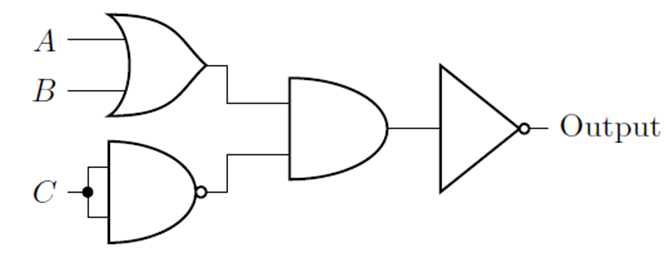

4. 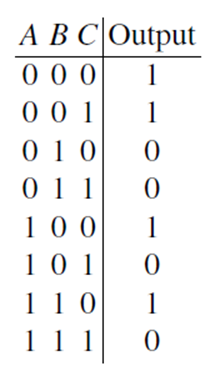

1. OR 게이트를 NOT게이트와 AND 게이트로 표현해봅시다.

In [18]:
def make_or_gate(a:bool, b:bool) -> bool:
    return not_gate((not_gate(a)) and (not_gate(b)))
    

In [19]:
generate_truth_table(2, make_or_gate)

Truth table of make_or_gate
input: (False, False), output: False
input: (False, True), output: True
input: (True, False), output: True
input: (True, True), output: True


2. AND 게이트를 NOT 게이트와 OR 게이트로 표현해봅시다.

In [22]:
def make_and_gate(a:bool, b:bool) -> bool:
    return not_gate((not_gate(a)) or (not_gate(b)))

In [23]:
generate_truth_table(2,make_and_gate)

Truth table of make_and_gate
input: (False, False), output: False
input: (False, True), output: False
input: (True, False), output: False
input: (True, True), output: True


3. 수업시간에 다루었던 복잡한 논리회로를 구성하고 진리표를 만들어 봅시다.

In [33]:
def test_3_gate(a:bool, b:bool, c:bool) -> bool:
    return not_gate((a or b) and nand_gate(c,c))

In [34]:
generate_truth_table(3, test_3_gate)

Truth table of test_3_gate
input: (False, False, False), output: True
input: (False, False, True), output: True
input: (False, True, False), output: False
input: (False, True, True), output: True
input: (True, False, False), output: False
input: (True, False, True), output: True
input: (True, True, False), output: False
input: (True, True, True), output: True


4. 수업시간에 다루었던 진리표를 표현하는 논리회로를 구현하고 같은 진리표가 나오는지 확인해 봅시다.

In [46]:
def test_4_gate(a:bool, b:bool, c:bool) -> bool:
    return ((not a) and (not b) and (not c)) or ((not a) and (not b) and c) or (a and (not b) and (not c)) or (a and b and (not c)) 

In [48]:
generate_truth_table(3, test_4_gate)

Truth table of test_4_gate
input: (False, False, False), output: True
input: (False, False, True), output: True
input: (False, True, False), output: False
input: (False, True, True), output: False
input: (True, False, False), output: True
input: (True, False, True), output: False
input: (True, True, False), output: True
input: (True, True, True), output: False


2020311998 위지원
2018311033 이종민